# Claude Sonnet 4 Resume Modification Comparison
## Comparing Original vs Once Modified vs Twice Modified Resumes

In [2]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load the score files
original_scores = pd.read_csv('Table1_Experimental_Modified_Resumes/Reproducibility_Scores/ScoresDoorDash_PM_Original_File_Original_CV_first_260.csv')
once_modified_scores = pd.read_csv('Table1_Experimental_Modified_Resumes/Reproducibility_Scores/ScoresDoorDash_PM_Original_File_file_2026-01-14_20-31.csv')
twice_modified_scores = pd.read_csv('Table1_Experimental_Modified_Resumes/Reproducibility_Scores/ScoresDoorDash_PM_Original_File_file_2026-01-14_21-18.csv')

In [4]:
# Check the data
print("Original CVs:")
print(original_scores.head())
print(f"\nShape: {original_scores.shape}")
print(f"\nOnce Modified CVs:")
print(once_modified_scores.head())
print(f"\nShape: {once_modified_scores.shape}")
print(f"\nTwice Modified CVs:")
print(twice_modified_scores.head())
print(f"\nShape: {twice_modified_scores.shape}")

Original CVs:
   Unnamed: 0  CV DoorDash PM Score
0           0                78.009
1           1                78.009
2           2                77.359
3           3                76.957
4           4                78.456

Shape: (260, 2)

Once Modified CVs:
   Unnamed: 0  \
0           0   
1           1   
2           2   
3           3   
4           4   

   Modified_claude-sonnet-4-20250514_of_CV_Modelclaude-sonnet-4-20250514 DoorDash PM Score  
0                                             79.642                                        
1                                             83.610                                        
2                                             80.933                                        
3                                             80.185                                        
4                                             78.706                                        

Shape: (260, 2)

Twice Modified CVs:
   Unnamed: 0  \
0           0   


In [5]:
# Create a combined dataframe
df = pd.DataFrame({
    'Original_Score': original_scores.iloc[:, 1],  # Assuming score is in second column
    'Once_Modified_Score': once_modified_scores.iloc[:, 1],
    'Twice_Modified_Score': twice_modified_scores.iloc[:, 1]
})

print(df.head())
print(f"\nStatistics:")
print(df.describe())

   Original_Score  Once_Modified_Score  Twice_Modified_Score
0          78.009               79.642                79.622
1          78.009               83.610                83.721
2          77.359               80.933                81.170
3          76.957               80.185                80.987
4          78.456               78.706                79.790

Statistics:
       Original_Score  Once_Modified_Score  Twice_Modified_Score
count      260.000000           260.000000            260.000000
mean        79.254892            79.517696             79.829381
std          1.830030             1.699971              1.650485
min         73.741000            74.817000             74.216000
25%         77.996500            78.476000             78.736750
50%         79.212500            79.485000             79.793500
75%         80.458500            80.456000             80.885500
max         85.276000            85.019000             85.206000


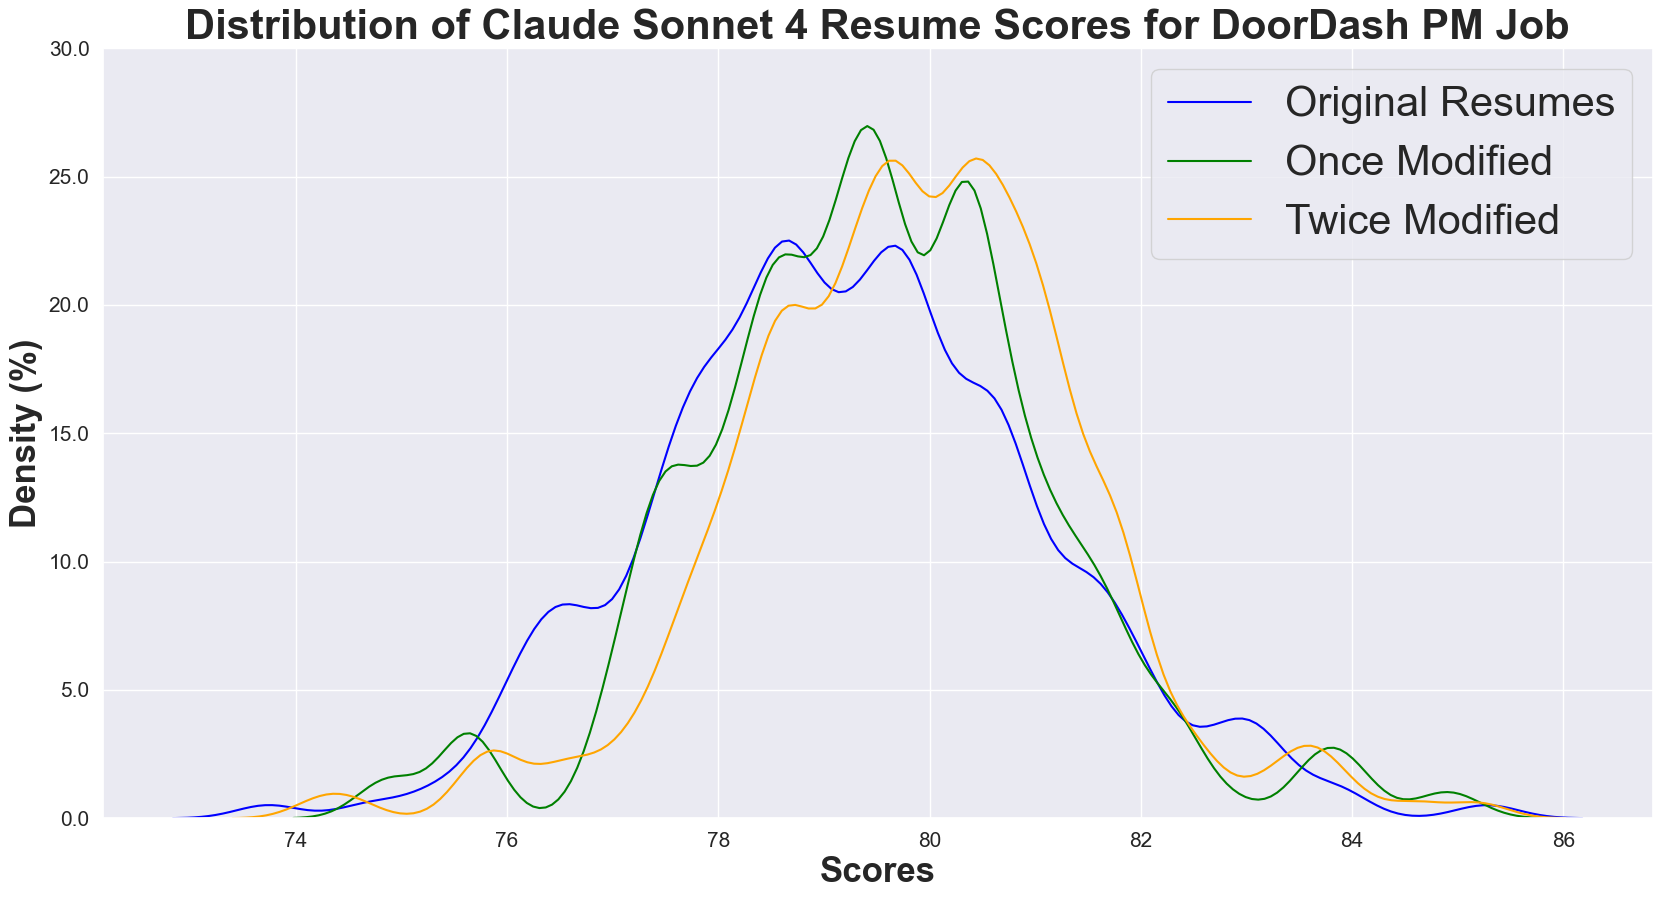

In [6]:
# Create the KDE plot comparing the three distributions
sns.set_theme(rc={'figure.figsize':(20,10)})
first_three_colors = ['blue', 'green', 'orange']

fig = sns.kdeplot(df['Original_Score'], bw_adjust=0.5, color=first_three_colors[0])
fig = sns.kdeplot(df['Once_Modified_Score'], bw_adjust=0.5, color=first_three_colors[1])
fig = sns.kdeplot(df['Twice_Modified_Score'], bw_adjust=0.5, color=first_three_colors[2])

plt.title('Distribution of Claude Sonnet 4 Resume Scores for DoorDash PM Job', fontsize=30, fontweight="bold")
plt.yticks(fig.get_yticks(), np.round(fig.get_yticks() * 100, 2))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Scores', fontsize=25, fontweight="bold")
plt.ylabel('Density (%)', fontsize=25, fontweight="bold")
plt.legend(['Original Resumes', 'Once Modified', 'Twice Modified'], fontsize=30)
plt.savefig('claude_sonnet_4_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

In [7]:
# Calculate mean improvements
print("Mean Scores:")
print(f"Original: {df['Original_Score'].mean():.3f}")
print(f"Once Modified: {df['Once_Modified_Score'].mean():.3f}")
print(f"Twice Modified: {df['Twice_Modified_Score'].mean():.3f}")
print(f"\nImprovements:")
print(f"Original → Once Modified: {(df['Once_Modified_Score'].mean() - df['Original_Score'].mean()):.3f}")
print(f"Once Modified → Twice Modified: {(df['Twice_Modified_Score'].mean() - df['Once_Modified_Score'].mean()):.3f}")
print(f"Original → Twice Modified: {(df['Twice_Modified_Score'].mean() - df['Original_Score'].mean()):.3f}")

Mean Scores:
Original: 79.255
Once Modified: 79.518
Twice Modified: 79.829

Improvements:
Original → Once Modified: 0.263
Once Modified → Twice Modified: 0.312
Original → Twice Modified: 0.574


/var/folders/65/990fsh2j2t96ggmcqmcl9d080000gn/T/ipykernel_68242/4201465100.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_melted, x='Modification', y='Score', palette=first_three_colors)


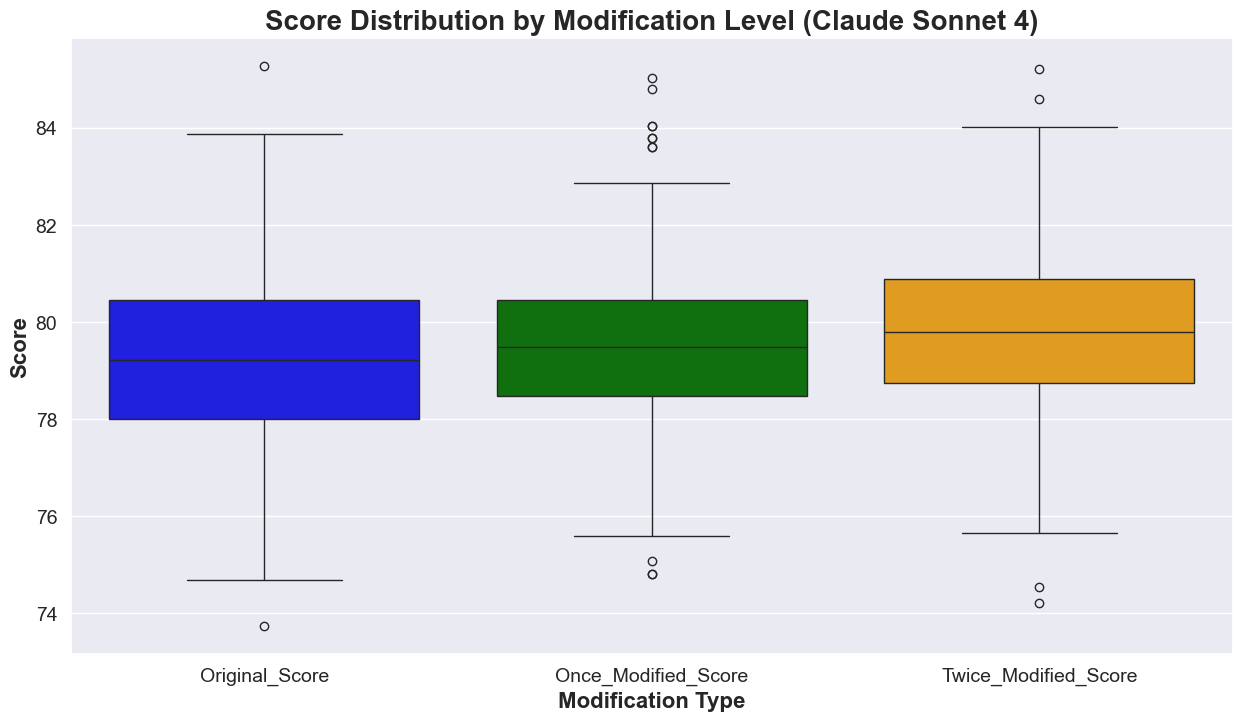

In [8]:
# Box plot comparison
plt.figure(figsize=(15, 8))
df_melted = df.melt(var_name='Modification', value_name='Score')
sns.boxplot(data=df_melted, x='Modification', y='Score', palette=first_three_colors)
plt.title('Score Distribution by Modification Level (Claude Sonnet 4)', fontsize=20, fontweight="bold")
plt.xlabel('Modification Type', fontsize=16, fontweight="bold")
plt.ylabel('Score', fontsize=16, fontweight="bold")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('claude_sonnet_4_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

In [9]:
# Pairwise score improvements
df['Improvement_1st'] = df['Once_Modified_Score'] - df['Original_Score']
df['Improvement_2nd'] = df['Twice_Modified_Score'] - df['Once_Modified_Score']
df['Total_Improvement'] = df['Twice_Modified_Score'] - df['Original_Score']

print("Improvement Statistics:")
print(df[['Improvement_1st', 'Improvement_2nd', 'Total_Improvement']].describe())

Improvement Statistics:
       Improvement_1st  Improvement_2nd  Total_Improvement
count       260.000000       260.000000         260.000000
mean          0.262804         0.311685           0.574488
std           2.541740         0.689680           2.516360
min          -6.960000        -1.726000          -6.846000
25%          -1.351500        -0.071250          -0.913750
50%           0.083500         0.243000           0.347500
75%           2.005750         0.728500           2.239500
max           8.255000         2.622000           8.442000


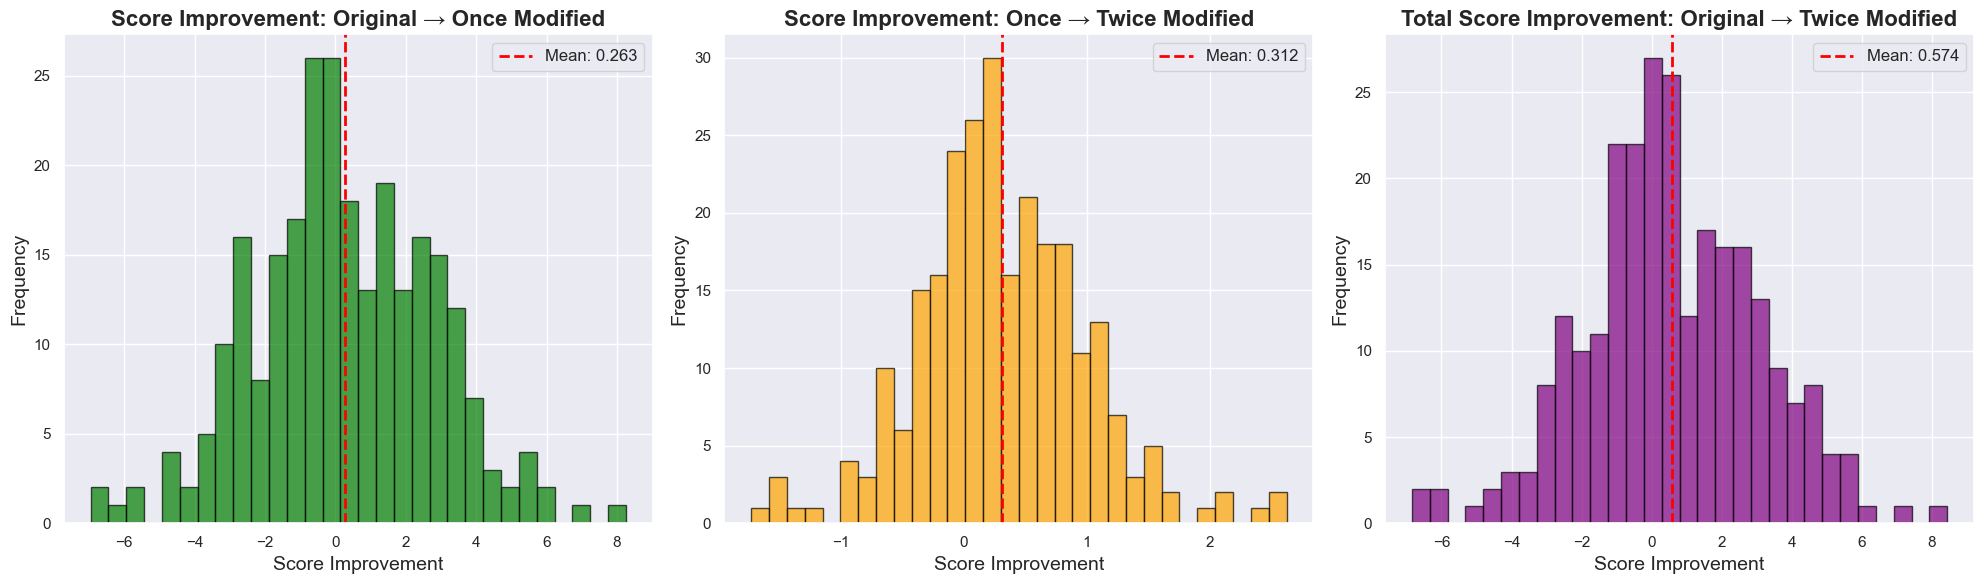

In [10]:
# Histogram of improvements
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

axes[0].hist(df['Improvement_1st'], bins=30, color=first_three_colors[1], alpha=0.7, edgecolor='black')
axes[0].set_title('Score Improvement: Original → Once Modified', fontsize=16, fontweight="bold")
axes[0].set_xlabel('Score Improvement', fontsize=14)
axes[0].set_ylabel('Frequency', fontsize=14)
axes[0].axvline(df['Improvement_1st'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["Improvement_1st"].mean():.3f}')
axes[0].legend(fontsize=12)

axes[1].hist(df['Improvement_2nd'], bins=30, color=first_three_colors[2], alpha=0.7, edgecolor='black')
axes[1].set_title('Score Improvement: Once → Twice Modified', fontsize=16, fontweight="bold")
axes[1].set_xlabel('Score Improvement', fontsize=14)
axes[1].set_ylabel('Frequency', fontsize=14)
axes[1].axvline(df['Improvement_2nd'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["Improvement_2nd"].mean():.3f}')
axes[1].legend(fontsize=12)

axes[2].hist(df['Total_Improvement'], bins=30, color='purple', alpha=0.7, edgecolor='black')
axes[2].set_title('Total Score Improvement: Original → Twice Modified', fontsize=16, fontweight="bold")
axes[2].set_xlabel('Score Improvement', fontsize=14)
axes[2].set_ylabel('Frequency', fontsize=14)
axes[2].axvline(df['Total_Improvement'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["Total_Improvement"].mean():.3f}')
axes[2].legend(fontsize=12)

plt.tight_layout()
plt.savefig('claude_sonnet_4_improvements.png', dpi=300, bbox_inches='tight')
plt.show()